In [1]:
# To show the output of all lines in a cell rather that just the last line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

In [4]:
data_amazon = pd.read_table("amazon_cells_labelled.txt"
                          , sep='\t', header=None, names=['sentence', 'sentiment'])
data_imdb = pd.read_table("imdb_labelled.txt"
                          , sep='\t', header=None, names=['sentence', 'sentiment'])
data_yelp = pd.read_table("yelp_labelled.txt"
                          , sep='\t', header=None, names=['sentence', 'sentiment'])

In [5]:
pd.set_option('display.max_colwidth', -1)
data_amazon.head(3)
data_imdb.head(3)
data_yelp.head(3)

,sentence,sentiment
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


,sentence,sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0


,sentence,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [6]:
data_amazon.shape
data_imdb.shape
data_yelp.shape

(1000, 2)

(748, 2)

(1000, 2)

In [7]:
all_data = pd.concat([data_amazon, data_imdb, data_yelp])

In [8]:
all_data.shape

(2748, 2)

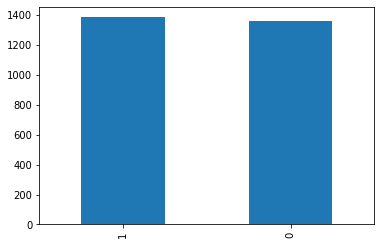

In [9]:
%matplotlib inline

all_data['sentiment'].value_counts().plot(kind='bar')

AUC-ROC metric is fine (there isn't class imbalance). We will also look at other metrics as well

In [10]:
sample_data = [['Good case for the money!', 1], 
     ['Do not waste your money.', 0], 
     ['Good product. Really good. Love it!', 1]] 
small_sample = pd.DataFrame(sample_data, columns = ['sentence', 'sentiment'])

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

CountVectorizer --> 'Convert a collection of text documents to a matrix of token counts'

TfidfTransformer --> 'Transform a count matrix to a normalized tf or tf-idf representation'

In [12]:
count_vec = CountVectorizer(binary=True, stop_words='english', ngram_range=(1,1))
count_vec.fit(small_sample.sentence)
small_transformed = count_vec.transform(small_sample.sentence)

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [13]:
small_sample

,sentence,sentiment
0,Good case for the money!,1
1,Do not waste your money.,0
2,Good product. Really good. Love it!,1


In [14]:
from pandas import DataFrame

print(DataFrame(small_transformed.A, columns=count_vec.get_feature_names()).to_string())

   case  good  love  money  product  really  waste
0  1     1     0     1      0        0       0    
1  0     0     0     1      0        0       1    
2  0     1     1     0      1        1       0    


In [15]:
tfidf = TfidfTransformer(use_idf=True)
tfidf.fit(small_transformed)
small_tfidfed = tfidf.transform(small_transformed)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [16]:
print(DataFrame(small_tfidfed.A, columns=count_vec.get_feature_names()).to_string())

       case      good      love     money   product    really     waste
0  0.680919  0.517856  0.000000  0.517856  0.000000  0.000000  0.000000
1  0.000000  0.000000  0.000000  0.605349  0.000000  0.000000  0.795961
2  0.000000  0.402040  0.528635  0.000000  0.528635  0.528635  0.000000


In [17]:
lr = LogisticRegression(penalty='l2', C=.8, random_state=21)

In [18]:
text_classifier = Pipeline([
    ('vectorizer', CountVectorizer(binary=False, stop_words='english', ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', lr),
#     ('clf', SGDClassifier()), #by default, this is SVM
])

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     all_data.sentence, all_data.sentiment, test_size=0.35, random_state=4)

In [20]:
text_classifier.fit(X_train, y_train)

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, voc...=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=0.8, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scalin

In [21]:
X_test[0:4]
y_test[0:4]

177    The atmosphere is modern and hip, while maintaining a touch of coziness.
720    Cute, quaint, simple, honest.                                           
525    It's an empty, hollow shell of a movie.                                 
630    Don't bother - go to the store.                                         
Name: sentence, dtype: object

177    1
720    1
525    0
630    0
Name: sentiment, dtype: int64

In [22]:
type(X_test)
type(y_test)

pandas.core.series.Series

pandas.core.series.Series

In [23]:
X_test = X_test.reset_index(drop = True) # drop=True discards the old index
X_test[0:4]

y_test = y_test.reset_index(drop = True)
y_test[0:4]

0    The atmosphere is modern and hip, while maintaining a touch of coziness.
1    Cute, quaint, simple, honest.                                           
2    It's an empty, hollow shell of a movie.                                 
3    Don't bother - go to the store.                                         
Name: sentence, dtype: object

0    1
1    1
2    0
3    0
Name: sentiment, dtype: int64

In [24]:
predicted_test = text_classifier.predict(X_test)
predicted_proba_test = text_classifier.predict_proba(X_test)

for i in range(5):
    print("{}, {}, {}, {}".format(X_test[i], predicted_test[i], predicted_proba_test[i], y_test[i]))

The atmosphere is modern and hip, while maintaining a touch of coziness., 1, [0.485742 0.514258], 1
Cute, quaint, simple, honest., 0, [0.55744477 0.44255523], 1
It's an empty, hollow shell of a movie.  , 1, [0.44838875 0.55161125], 0
Don't bother - go to the store., 0, [0.65670657 0.34329343], 0
To those who find this movie intelligent or even masterful, I can only say - it's your intelligence and your imagination you obviously used to try and make some sense of this pitiful attempt (it's in our human nature to try and make sense of things) .  , 0, [0.54095394 0.45904606], 0


In [25]:
from sklearn import metrics

predicted_train = text_classifier.predict(X_train)

y_train = y_train.astype('category')
print(metrics.classification_report(y_train, predicted_train,
    labels=y_train.cat.categories.tolist()))

metrics.confusion_matrix(y_train, predicted_train)

predicted_test = text_classifier.predict(X_test)

y_test = y_test.astype('category')
print(metrics.classification_report(y_test, predicted_test,
    labels=y_test.cat.categories.tolist()))

metrics.confusion_matrix(y_test, predicted_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       880
           1       0.97      0.98      0.98       906

    accuracy                           0.98      1786
   macro avg       0.98      0.98      0.98      1786
weighted avg       0.98      0.98      0.98      1786



array([[855,  25],
       [ 14, 892]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       482
           1       0.80      0.80      0.80       480

    accuracy                           0.80       962
   macro avg       0.80      0.80      0.80       962
weighted avg       0.80      0.80      0.80       962



array([[385,  97],
       [ 94, 386]], dtype=int64)

In [26]:
metrics.precision_score(y_test, predicted_test, average='macro') 
metrics.precision_score(y_test, predicted_test, average='micro') 
metrics.precision_score(y_test, predicted_test, average='weighted') 
metrics.recall_score(y_test, predicted_test, average='micro')

0.8014648357300622

0.8014553014553014

0.8014696028674426

0.8014553014553014

Be aware of the macro vs. micro vs. weighted averages. Look at the one based on the problem. In multi-class classification sometimes some of these metrics are equal. E.g. micro-average precision and recall are always the same.

Trained model predicting on a single sample

In [27]:
text_classifier.predict_proba(['Dogs love us!'])

array([[0.27483834, 0.72516166]])

In [28]:
text_classifier2 = Pipeline([
    ('vectorizer', CountVectorizer(stop_words=None, ngram_range=(1, 2), max_features=2000, binary=False)),
    ('tfidf', TfidfTransformer(norm='l2', use_idf=True)),
    ('clf', LogisticRegression(penalty='l1', C=0.9, random_state=21)),
])

In [29]:
text_classifier2.fit(all_data['sentence'], all_data['sentiment'])

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=2000, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=0.9, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [30]:
import pickle

# save the model to disk
filename = 'model_v1.pkl'
pickle.dump(text_classifier2, open(filename, 'wb'), protocol=2)

In [31]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

"%2.1f%% Positive" % (100 * loaded_model.predict_proba(["But he does like you!"])[0:1][:,1][0])

'46.0% Positive'

In [32]:
def grid_search(stop_words_list, ngram_ranges_list, max_features_list, binary_list, #CV
               norm_list, use_idf_list, #TFIDF
               penalty_list, C_list #LR 
               ):
    for sw in stop_words_list:
        for ng in ngram_ranges_list:
            for mf in max_features_list:
                for b in binary_list:
                    for n in norm_list:
                        for ui in use_idf_list:
                            for p in penalty_list:
                                for c in C_list:
                                    text_classifier = Pipeline([
                                        ('vectorizer', CountVectorizer(stop_words=sw, ngram_range=ng, max_features=mf, binary=b)),
                                        ('tfidf', TfidfTransformer(norm=n, use_idf=ui)),
                                        ('clf', LogisticRegression(penalty=p, C=c, random_state=21)),

                                    ])
                                    text_classifier.fit(X_train, y_train) 
                                    predicted_train = text_classifier.predict(X_train)
                                    predicted_test = text_classifier.predict(X_test)
                                    prec_train = round(metrics.recall_score(y_train, predicted_train, average='micro'), 2)
                                    prec_test = round(metrics.recall_score(y_test, predicted_test, average='micro'), 2)
                                    ratio = prec_train/prec_test
                                    if (ratio > 0.92) & (ratio < 1.07) & (prec_train > 0.7):
                                        print("prec_trn {}, prec_tst {} *** sw = {}, ng = {}, mf = {}, b = {}, n = {}, ui = {}, p = {}, c = {}".format(prec_train, prec_test, sw, ng, mf, b, n, ui, p, c))
                                    else:
                                        print("prec_trn {}, prec_tst {}     sw = {}, ng = {}, mf = {}, b = {}, n = {}, ui = {}, p = {}, c = {}".format(prec_train, prec_test, sw, ng, mf, b, n, ui, p, c))

In [33]:
grid_search(stop_words_list=['english', None], ngram_ranges_list=[(1,2), (1,3)], max_features_list=[2000, 5000, 60000], binary_list=[True, False],
            norm_list=['l2', 'l1'], use_idf_list=[True, False],
            penalty_list=['l1', 'l2'], C_list=[.01, 0.07, 0.1, 0.2, 0.9])

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.63, prec_tst 0.65     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.76 *** sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.63, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.88, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.2
prec_trn 0.93, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.75 *** sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.72, prec_tst 0.66     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.84, prec_tst 0.79 *** sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.85, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.9, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.71     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.51     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.7     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.83, prec_tst 0.74     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.71 *** sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.73     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.84, prec_tst 0.77     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.77     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.87, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.64, prec_tst 0.65     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.76 *** sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.63, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.88, prec_tst 0.8     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.2
prec_trn 0.92, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.75 *** sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.67     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.84, prec_tst 0.79 *** sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.85, prec_tst 0.78     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.9, prec_tst 0.81     sw = english, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.71, prec_tst 0.71 *** sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.01
prec_trn 0.77, prec_tst 0.71     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.74     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.71, prec_tst 0.72 *** sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.82, prec_tst 0.74     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.84, prec_tst 0.77     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.1
prec_trn 0.85, prec_tst 0.77     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.62, prec_tst 0.64     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.59, prec_tst 0.58     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.91, prec_tst 0.79     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.81     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.77, prec_tst 0.76 *** sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.62     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.79     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.69, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.68, prec_tst 0.65     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.76, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.77     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.7, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.76, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.74     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.1
prec_trn 0.86, prec_tst 0.77     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.62, prec_tst 0.64     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.58, prec_tst 0.58     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.1

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.92, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.81     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.77, prec_tst 0.76 *** sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.63     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.68, prec_tst 0.66     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.71     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.7     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.71     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.83, prec_tst 0.76     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.73, prec_tst 0.73 *** sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.53, prec_tst 0.53     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.94, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.95, prec_tst 0.8     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.81     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.2
prec_trn 0.98, prec_tst 0.81     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.61, prec_tst 0.64     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.74 *** sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.6, prec_tst 0.59     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.91, prec_tst 0.78     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.96, prec_tst 0.81     sw = english, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.58, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.61, prec_tst 0.62     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.7     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.95, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.63     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.69, prec_tst 0.68     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.75     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.89, prec_tst 0.78     sw = english, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.74, prec_tst 0.73 *** sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.54, prec_tst 0.53     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.94, prec_tst 0.78     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.8     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.1
prec_trn 0.96, prec_tst 0.8     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.98, prec_tst 0.8     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.61, prec_tst 0.63     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.74 *** sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.6, prec_tst 0.59     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.91, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.96, prec_tst 0.8     sw = english, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.01
prec_trn 0.58, prec_tst 0.58     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.63     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.76, prec_tst 0.71     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.79     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.63     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.69, prec_tst 0.68     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.76     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.89, prec_tst 0.78     sw = english, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.63, prec_tst 0.65     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.2
prec_trn 0.78, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.61     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.1
prec_trn 0.89, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.77, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.66     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.85, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.86, prec_tst 0.8     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.7, prec_tst 0.71     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.51     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.01
prec_trn 0.77, prec_tst 0.7     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.74     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.71, prec_tst 0.71 *** sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.81, prec_tst 0.74     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.84, prec_tst 0.77     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.78     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.86, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.64, prec_tst 0.65     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.2
prec_trn 0.78, prec_tst 0.76 *** sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.61     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.8     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.1
prec_trn 0.89, prec_tst 0.8     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.71, prec_tst 0.67 *** sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.84, prec_tst 0.79 *** sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.85, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.9, prec_tst 0.81     sw = english, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.71     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.7     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.83, prec_tst 0.74     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.89, prec_tst 0.79     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.72 *** sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.74     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.84, prec_tst 0.77     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.78     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.86, prec_tst 0.78     sw = english, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.6, prec_tst 0.62     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.58, prec_tst 0.58     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.79     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.81     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.81     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.64, prec_tst 0.65     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.66, prec_tst 0.63     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.7, prec_tst 0.71     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.68, prec_tst 0.65     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.74, prec_tst 0.7 *** sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.1

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.86, prec_tst 0.75     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.7, prec_tst 0.7     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.74, prec_tst 0.69     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.73     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.88, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.2
prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.58     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.91, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.07

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.81     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.65     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.76, prec_tst 0.75 *** sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.63     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.07

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.87, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.79     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.92, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.9

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.69, prec_tst 0.71     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.01
prec_trn 0.69, prec_tst 0.66     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.07

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.74, prec_tst 0.71 *** sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.77     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.91, prec_tst 0.8     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.7, prec_tst 0.7     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.75, prec_tst 0.7     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.74     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.1
prec_trn 0.86, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.78     sw = english, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.73, prec_tst 0.72 *** sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.52     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.77     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.78     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.97, prec_tst 0.81     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.99, prec_tst 0.81     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.73, prec_tst 0.73 *** sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.57, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.93, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.1

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.93, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.97, prec_tst 0.81     sw = english, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.63, prec_tst 0.66     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.56, prec_tst 0.56     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.59     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.68, prec_tst 0.69     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.78     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.01
prec_trn 0.59, prec_tst 0.59     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.07

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.62, prec_tst 0.65     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.71     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.9, prec_tst 0.77     sw = english, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.73, prec_tst 0.73 *** sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.53, prec_tst 0.52     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.95, prec_tst 0.78     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.1
prec_trn 0.97, prec_tst 0.81     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.99, prec_tst 0.8     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.74, prec_tst 0.73 *** sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.58, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.93, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.79     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.8     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.97, prec_tst 0.81     sw = english, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.66     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.56, prec_tst 0.56     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.68, prec_tst 0.69     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.78     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.59, prec_tst 0.6     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.1
prec_trn 0.79, prec_tst 0.73     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.9, prec_tst 0.77     sw = english, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.78 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.61     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.07
prec_trn 0.88, prec_tst 0.79     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.81     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.79, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.72, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.07
prec_trn 0.78, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.76 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.88, prec_tst 0.79     sw = None, ng = (1, 2), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.7     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.01

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.62, prec_tst 0.59     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.66     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.1
prec_trn 0.82, prec_tst 0.74     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.87, prec_tst 0.79     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.69     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.64     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.72, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.72 *** sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.8, prec_tst 0.74     sw = None, ng = (1, 2), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.07
prec_trn 0.59, prec_tst 0.62     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.2
prec_trn 0.79, prec_tst 0.78 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.62     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.01
prec_trn 0.85, prec_tst 0.78     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.79     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.1
prec_trn 0.88, prec_tst 0.8     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.81     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.9
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.77, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.67 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.76, prec_tst 0.71     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.8, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.2
prec_trn 0.88, prec_tst 0.8     sw = None, ng = (1, 2), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.71     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.6     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.07
prec_trn 0.71, prec_tst 0.66     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.74     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.2
prec_trn 0.87, prec_tst 0.78     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.9

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.69     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.66     sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.07
prec_trn 0.73, prec_tst 0.69 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.72 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.79, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.59, prec_tst 0.61     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.77 *** sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.78     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.82     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.7, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.01
prec_trn 0.79, prec_tst 0.73     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.74     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.1
prec_trn 0.83, prec_tst 0.76     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.2

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.91, prec_tst 0.79     sw = None, ng = (1, 2), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.9

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.68, prec_tst 0.69     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.59     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.71     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.8     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.68, prec_tst 0.69     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.6     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.65     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.1
prec_trn 0.76, prec_tst 0.7     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.2
prec_trn 0.8, prec_tst 0.74     sw = None, ng = (1, 2), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.1
prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.78 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.9
prec_trn 0.62, prec_tst 0.58     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.79     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.8     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.82     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.07
prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.1

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.2
prec_trn 0.76, prec_tst 0.75 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.72 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.75     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = None, ng = (1, 2), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.07
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.2
prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.9
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.6     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.71     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.79     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.61     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.66     sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.72 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.74 *** sw = None, ng = (1, 2), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.74 *** sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.53     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.77     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.79     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.8     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.98, prec_tst 0.82     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.61     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.73     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.73     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.75     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.94, prec_tst 0.79     sw = None, ng = (1, 2), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.52     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.54     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.61     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.78     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.1
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.2
prec_trn 0.66, prec_tst 0.67     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.56, prec_tst 0.55     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.6, prec_tst 0.58     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.67     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.73     sw = None, ng = (1, 2), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.07

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.62     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.2
prec_trn 0.75, prec_tst 0.74 *** sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.53     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.78     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.78     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.8     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.98, prec_tst 0.82     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.01
prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.1
prec_trn 0.63, prec_tst 0.66     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.74, prec_tst 0.73 *** sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.9
prec_trn 0.67, prec_tst 0.63     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.72     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.72     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.74     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.79     sw = None, ng = (1, 2), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.01
prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.1
prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.52     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.54     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.62     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.78     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.56, prec_tst 0.56     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.6, prec_tst 0.58     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.67     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.74     sw = None, ng = (1, 2), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.78 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.61     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.79     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.8     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.81     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.67     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.76 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = None, ng = (1, 3), mf = 2000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.7     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.58     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.65     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.74     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.79     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.69     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.64     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.72, prec_tst 0.68 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.72 *** sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.74     sw = None, ng = (1, 3), mf = 2000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.78 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.62     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.78     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.86, prec_tst 0.79     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.8     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.92, prec_tst 0.81     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.67 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.71     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.8     sw = None, ng = (1, 3), mf = 2000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.7     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.59     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.66     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.74     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.78     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.69     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.65     sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.73, prec_tst 0.69 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.72 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 2000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.59, prec_tst 0.61     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.77 *** sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.8     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.91, prec_tst 0.8     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.82     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.74 *** sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.76     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.79     sw = None, ng = (1, 3), mf = 5000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.56, prec_tst 0.55     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.59     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.7     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.8     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.59     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.69, prec_tst 0.65     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.7     sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.8, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 5000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.77 *** sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.88, prec_tst 0.78     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.9, prec_tst 0.8     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.81     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.75 *** sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.71, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.71     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.78, prec_tst 0.72     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.76     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.8     sw = None, ng = (1, 3), mf = 5000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.55     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.59     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.77, prec_tst 0.7     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.89, prec_tst 0.79     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.67, prec_tst 0.69     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.61     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.7, prec_tst 0.66     sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.76, prec_tst 0.72 *** sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.79, prec_tst 0.74 *** sw = None, ng = (1, 3), mf = 5000, b = False, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.74, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.94, prec_tst 0.75     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.78     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.98, prec_tst 0.8     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.99, prec_tst 0.82     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.75, prec_tst 0.72 *** sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.62, prec_tst 0.59     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.83, prec_tst 0.72     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.84, prec_tst 0.73     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.73     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.78     sw = None, ng = (1, 3), mf = 60000, b = True, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.58, prec_tst 0.58     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.52     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.57     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.75     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.66     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.53     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.55     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.62     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.71     sw = None, ng = (1, 3), mf = 60000, b = True, n = l1, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.56     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.74, prec_tst 0.73 *** sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.93, prec_tst 0.75     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.96, prec_tst 0.77     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.97, prec_tst 0.8     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.99, prec_tst 0.82     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.55, prec_tst 0.57     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.61, prec_tst 0.62     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.65     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.73, prec_tst 0.72 *** sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.63, prec_tst 0.59     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.72     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.82, prec_tst 0.73     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.85, prec_tst 0.73     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.95, prec_tst 0.78     sw = None, ng = (1, 3), mf = 60000, b = False, n = l2, ui = False, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.6, prec_tst 0.6     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.52, prec_tst 0.51     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.52     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.57, prec_tst 0.57     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.87, prec_tst 0.75     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = True, p = l2, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.49, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.65, prec_tst 0.67     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l1, c = 0.9


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.51, prec_tst 0.5     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.01


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.53, prec_tst 0.53     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.07


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.56, prec_tst 0.56     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.1


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.64, prec_tst 0.63     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.2


C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


prec_trn 0.81, prec_tst 0.72     sw = None, ng = (1, 3), mf = 60000, b = False, n = l1, ui = False, p = l2, c = 0.9
